## MODELING

### Roadmap:
(1) Random Forest for feature importance

(2) Clustering (optional)

(3) SVM

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from __future__ import division

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
from sklearn.metrics import roc_auc_score

In [7]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [8]:
train = pd.read_csv("../assets/train_complete_mg.csv")

In [9]:
test = pd.read_csv("../assets/test_complete_mg.csv")

In [10]:
X = train.drop("WnvPresent", axis = 1) ##setting up df of possible explanatory variables

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
X["TrapCoded"] = le.fit_transform(X.Trap)

In [14]:
X.drop(["Trap", "YMD", "Sunrise", "Sunset", "Species", "NumMosquitos" ], axis = 1, inplace = True)

In [15]:
y = train.WnvPresent ##and array of dependent variable

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 19)
##splitting up original train file into train-test sections, to validate model

In [17]:
from sklearn.model_selection import StratifiedKFold

In [18]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=24) ##stratifying the cross validation

In [19]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print rf.score(X_test, y_test)

0.931541106596


In [20]:
confusion_matrix(y_test, y_pred)

array([[2959,   64],
       [ 155,   21]])

In [21]:
##Confusion Matrix: 
##True Negatives = 2969
##False Negatives = 152 (classified 0, actually 1)
##True Positives = 24
##False Positives = 54 (predicted 1, actually 0)

In [22]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.98      0.96      3023
          1       0.25      0.12      0.16       176

avg / total       0.91      0.93      0.92      3199



In [23]:
##Classification Report:
#Precision: when predicting, 0, how often correct? = TN / TN + FN  
    #when predicting 1, how often correct? = TP / TP + FP 
    
#Recall(1) = Sensitivity = TP / TP + FN = 
    #Recall(0) = How often does model predict no, when it is actually no?
            #TN / TN + FP
#f1-score = weighted average of precision and recall
    #f1 = 2*(precision*recall) / (precision+recall)

#support = number of observations for each class in actual data (not predictions)

(-1, 39)

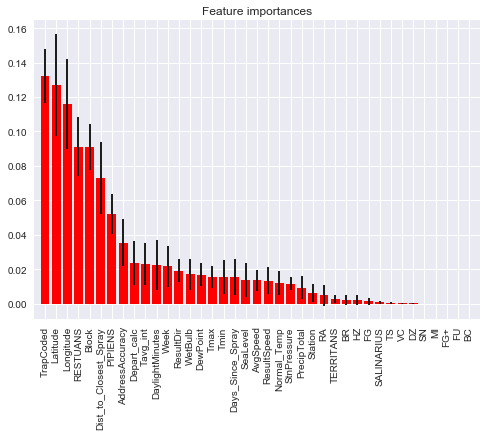

In [24]:
all(rf.feature_importances_ == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])

In [25]:
s = cross_val_score(rf, X_train, y_train, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3))


Random Forest Score:	0.94 ± 0.0


In [26]:
probabilities = rf.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

0.672082218146


In [27]:
X2 = X[["TrapCoded", "RESTUANS", "PIPIENS", "DaylightMinutes", "DewPoint", "Tmax", "Week", "Dist_to_Closest_Spray", "Days_Since_Spray"]]

In [28]:
X2.head()

,TrapCoded,RESTUANS,PIPIENS,DaylightMinutes,DewPoint,Tmax,Week,Dist_to_Closest_Spray,Days_Since_Spray
0,1,1,1,896,59,88,22,1.5,720
1,1,1,0,896,59,88,22,1.5,720
2,6,1,0,896,58,88,22,1.5,720
3,13,1,1,896,58,88,22,1.5,720
4,13,1,0,896,58,88,22,1.5,720


In [29]:
y = train.WnvPresent

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.33, random_state = 54, stratify = y)

In [31]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print rf.score(X_test, y_test)

0.932791497343


In [32]:
confusion_matrix(y_test, y_pred)

array([[2966,   67],
       [ 148,   18]])

In [33]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97      3033
          1       0.21      0.11      0.14       166

avg / total       0.91      0.93      0.92      3199



(-1, 9)

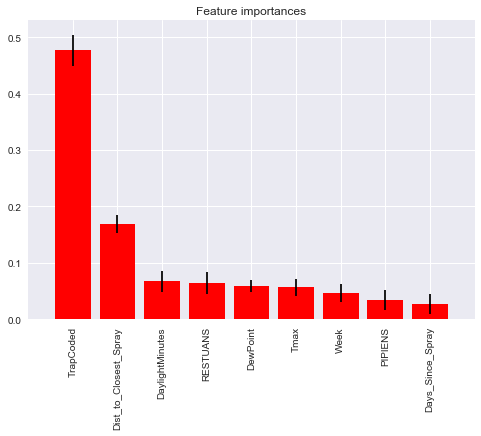

In [34]:
all(rf.feature_importances_ == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X2.columns

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X2.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X2.shape[1]])

In [35]:
s = cross_val_score(rf, X_train, y_train, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3))


Random Forest Score:	0.93 ± 0.003


In [36]:
probabilities = rf.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

0.725576887173


In [37]:
rf = RandomForestClassifier(n_estimators=20, max_depth = 5, n_jobs=-1, verbose = 1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print rf.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


0.948108783995


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


In [38]:
confusion_matrix(y_test, y_pred)

array([[3033,    0],
       [ 166,    0]])

In [39]:
print (classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3033
          1       0.00      0.00      0.00       166

avg / total       0.90      0.95      0.92      3199



/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(-1, 9)

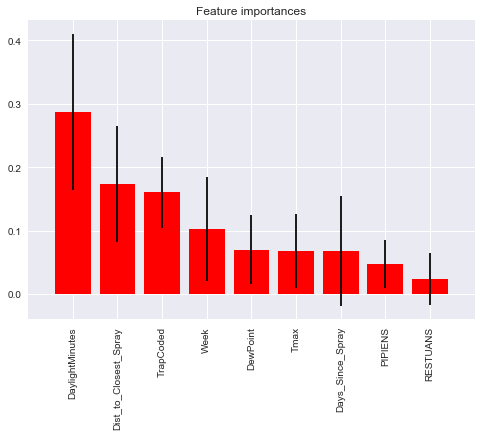

In [40]:
all(rf.feature_importances_ == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X2.columns

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X2.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X2.shape[1]])

In [41]:
probabilities = rf.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

0.84536464354


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
rf = RandomForestClassifier(class_weight = "balanced")

In [44]:
params = {
    "n_estimators": (5, 10, 20, 25, 30, 40),
    "criterion": ("gini", "entropy"),
    "max_depth": (20, 40, 60, 80)   
}

In [45]:
gridlock = GridSearchCV(rf, params, verbose = 1, cv = cv, n_jobs = -1)
gridlock.fit(X2, y)
print gridlock
print "Best score :"
print gridlock.best_score_
print gridlock.best_estimator_
print gridlock.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   12.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=24, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': (5, 10, 20, 25, 30, 40), 'criterion': ('gini', 'entropy'), 'max_depth': (20, 40, 60, 80)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)
Best score :
0.926854431033
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=80, max_features='auto',
            max_leaf_nodes=None, min_impurity_s

In [47]:
rf_upgrade = RandomForestClassifier(criterion = "entropy", class_weight = "balanced", max_depth = 80, n_jobs = -1, verbose = 1)

In [48]:
rf_upgrade.fit(X_train, y_train)
y_pred = rf_upgrade.predict(X_test)
print rf_upgrade.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


0.928102532041


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


In [49]:
confusion_matrix(y_test, y_pred)

array([[2941,   92],
       [ 138,   28]])

In [50]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96      3033
          1       0.23      0.17      0.20       166

avg / total       0.92      0.93      0.92      3199



(-1, 9)

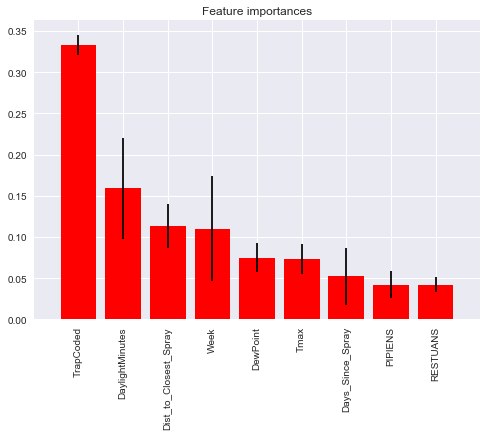

In [51]:
all(rf_upgrade.feature_importances_ == np.mean([tree.feature_importances_ for tree in rf_upgrade.estimators_], axis=0))

importances = rf_upgrade.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 

std = np.std([tree.feature_importances_ for tree in rf_upgrade.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X2.columns

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X2.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X2.shape[1]])

In [52]:
probabilities = rf_upgrade.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

0.70368715217


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

In [54]:
pipeline = Pipeline([
    ("rfpipe", RandomForestClassifier(class_weight = "balanced", n_jobs = -1, verbose = 1)),
    ("gbpipe", GradientBoostingClassifier(verbose = 1))
])

In [55]:
pipeline.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


      Iter       Train Loss   Remaining Time 
         1           0.3951            0.45s
         2           0.3852            0.46s
         3           0.3778            0.40s
         4           0.3720            0.36s
         5           0.3663            0.33s
         6           0.3618            0.31s
         7           0.3579            0.29s
         8           0.3549            0.28s
         9           0.3519            0.27s
        10           0.3494            0.26s
        20           0.3338            0.20s
        30           0.3251            0.16s
        40           0.3202            0.13s
        50           0.3153            0.11s
        60           0.3111            0.09s
        70           0.3077            0.06s
        80           0.3048            0.04s
        90           0.3017            0.02s
       100           0.2981            0.00s


Pipeline(steps=[('rfpipe', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0....=100, presort='auto', random_state=None,
              subsample=1.0, verbose=1, warm_start=False))])

In [56]:
y_pred = pipeline.predict(X_test)

/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [57]:
confusion_matrix(y_test, y_pred)

array([[3030,    3],
       [ 165,    1]])

In [58]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3033
          1       0.25      0.01      0.01       166

avg / total       0.91      0.95      0.92      3199



In [59]:
probabilities = pipeline.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


0.833511096811


In [60]:
gb = GradientBoostingClassifier()

In [61]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [62]:
y_pred = gb.predict(X_test)
print gb.score(X_test, y_test)

0.949359174742


In [63]:
s = cross_val_score(gb, X_train, y_train, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Gradient Boosting Trees Classifier", s.mean().round(3), s.std().round(3))

Gradient Boosting Trees Classifier Score:	0.946 ± 0.001


In [64]:
confusion_matrix (y_test, y_pred)

array([[3029,    4],
       [ 158,    8]])

In [65]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3033
          1       0.67      0.05      0.09       166

avg / total       0.94      0.95      0.93      3199



In [66]:
gb.feature_importances_

array([ 0.24830064,  0.01696654,  0.03144559,  0.136736  ,  0.09725641,
        0.12378378,  0.02604058,  0.23134953,  0.08812093])

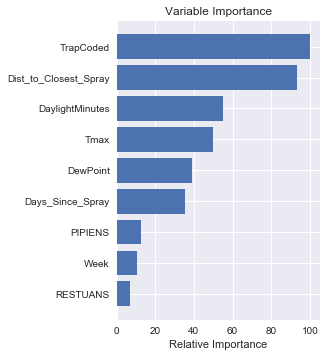

In [67]:
##VIZ taken straight from sklearn docs

feature_importance = gb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [68]:
probabilities = gb.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

0.845486793862


In [69]:
params = {
    "loss": ("deviance", "exponential"),
    "n_estimators": (100, 125, 150, 175),
    "max_depth": (4, 5, 6, 7)
}

In [70]:
gb = GradientBoostingClassifier()

In [71]:
gridgrad = GridSearchCV(gb, params, verbose = 1, cv = cv, n_jobs = -1)
gridgrad.fit(X2, y)
print gridgrad
print "Best score: "
print gridgrad.best_score_
print gridgrad.best_estimator_
print gridgrad.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   43.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=24, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': (100, 125, 150, 175), 'loss': ('deviance', 'exponential'), 'max_depth': (4, 5, 6, 7)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)
Best score: 
0.948210048489
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=4,
              max_featu

In [72]:
geebee = GradientBoostingClassifier( loss = "exponential", max_depth = 4)

In [73]:
geebee.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [74]:
y_pred = geebee.predict(X_test)
print geebee.score(X_test, y_test)

0.949046577055


In [75]:
s = cross_val_score(geebee, X_train, y_train, cv=cv, n_jobs=1)

In [76]:
print(str(s.mean()) + " +/- " +  str(s.std()))

0.946720133993 +/- 0.000779282387158


In [77]:
confusion_matrix(y_test, y_pred)

array([[3033,    0],
       [ 163,    3]])

In [78]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3033
          1       1.00      0.02      0.04       166

avg / total       0.95      0.95      0.93      3199



In [79]:
probabilities = geebee.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

0.83373851489


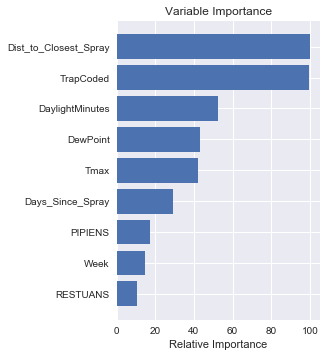

In [80]:
##VIZ taken straight from sklearn docs

feature_importance = geebee.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
##Do we go with rf_upgrade??

In [81]:
test.shape

(116293, 43)

In [82]:
train.shape

(9693, 45)

In [108]:
test.head()

,Species,Block,Trap,Latitude,Longitude,AddressAccuracy,YMD,PIPIENS,RESTUANS,SALINARIUS,TERRITANS,Station,Tmax,Tmin,DewPoint,WetBulb,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,Days_Since_Spray,Dist_to_Closest_Spray,Week,DaylightMinutes,TrapCoded
0,CULEX PIPIENS/RESTUANS,41,T002,41.95469,-87.800991,9,2008-06-11 00:00:00,1,1,0,0,2,86,66,55,64.0,1900-01-01 04:16:00,1900-01-01 19:26:00,0.0,29.34,29.97,9.4,18,10.4,76,67.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,720,1.5,24,910,1
1,CULEX RESTUANS,41,T002,41.95469,-87.800991,9,2008-06-11 00:00:00,0,1,0,0,2,86,66,55,64.0,1900-01-01 04:16:00,1900-01-01 19:26:00,0.0,29.34,29.97,9.4,18,10.4,76,67.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,720,1.5,24,910,1
2,CULEX PIPIENS,41,T002,41.95469,-87.800991,9,2008-06-11 00:00:00,1,0,0,0,2,86,66,55,64.0,1900-01-01 04:16:00,1900-01-01 19:26:00,0.0,29.34,29.97,9.4,18,10.4,76,67.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,720,1.5,24,910,1
3,CULEX SALINARIUS,41,T002,41.95469,-87.800991,9,2008-06-11 00:00:00,0,0,1,0,2,86,66,55,64.0,1900-01-01 04:16:00,1900-01-01 19:26:00,0.0,29.34,29.97,9.4,18,10.4,76,67.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,720,1.5,24,910,1
4,CULEX TERRITANS,41,T002,41.95469,-87.800991,9,2008-06-11 00:00:00,0,0,0,1,2,86,66,55,64.0,1900-01-01 04:16:00,1900-01-01 19:26:00,0.0,29.34,29.97,9.4,18,10.4,76,67.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,720,1.5,24,910,1


In [106]:
X2.head()

,TrapCoded,RESTUANS,PIPIENS,DaylightMinutes,DewPoint,Tmax,Week,Dist_to_Closest_Spray,Days_Since_Spray
0,1,1,1,896,59,88,22,1.5,720
1,1,1,0,896,59,88,22,1.5,720
2,6,1,0,896,58,88,22,1.5,720
3,13,1,1,896,58,88,22,1.5,720
4,13,1,0,896,58,88,22,1.5,720


In [107]:
test["TrapCoded"] = le.fit_transform(test.Trap)

In [109]:
targetX = test[["TrapCoded", "RESTUANS", "PIPIENS", "DaylightMinutes", 
                "DewPoint", "Tmax", "Week", "Dist_to_Closest_Spray", "Days_Since_Spray"]]

In [110]:
targety = pd.read_csv("../assets/test.csv")

In [111]:
targety = targety[["Id"]]

In [112]:
targety.dtypes

Id    int64
dtype: object

In [113]:
targety.shape

(116293, 1)

In [105]:
REF = RandomForestClassifier(criterion = "entropy", class_weight = "balanced", max_depth = 80, n_jobs = -1, verbose = 1)

In [115]:
REF.fit(X2, y)
y_pred = REF.predict_proba(targetX)


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


In [117]:
y_pred.shape

(116293, 2)

In [118]:
y_pred

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [119]:
probability_list = [] # Becomes the list of probabilities
for i in y_pred:
    probability_list.append(i[1])
    y_pred = probability_list

In [123]:
sum(probability_list) ##checking that it's not predicting all zeros

3272.0580337250517

In [124]:
from __future__ import division

In [125]:
3272/116293

0.028135829327646546

In [126]:
targety["WnvPresent"] = probability_list

In [128]:
targety[targety.WnvPresent != 0.0]

,Id,WnvPresent
2624,2625,0.100000
2625,2626,0.100000
2626,2627,0.100000
2627,2628,0.100000
2628,2629,0.100000
2629,2630,0.100000
2630,2631,0.100000
2631,2632,0.100000
2632,2633,0.100000
2633,2634,0.100000


In [129]:
submission1 = targety.to_csv("../assets/submission1_mg.csv", index = False, encoding = "utf-8")

In [130]:
REF2 = RandomForestClassifier()

In [131]:
REF2.fit(X2, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [132]:
y_pred2 = REF2.predict_proba(targetX)

In [133]:
probability_list = [] # Becomes the list of probabilities
for i in y_pred2:
    probability_list.append(i[1])
    y_pred2 = probability_list

In [134]:
sum(probability_list)

3709.7034744822226

In [135]:
targety["WnvPresent"] = probability_list

In [136]:
submission2 = targety.to_csv("../assets/submission2_mg.csv", index = False, encoding = "utf-8")

In [137]:
geebee = GradientBoostingClassifier( loss = "exponential", max_depth = 4)

In [138]:
geebee.fit(X2, y)
y_pred3 = geebee.predict_proba(targetX)
probability_list = [] # Becomes the list of probabilities
for i in y_pred3:
    probability_list.append(i[1])
    y_pred3 = probability_list

In [139]:
sum(probability_list)

1635.792253108965

In [140]:
targety["WnvPresent"] = probability_list

In [141]:
submission3 = targety.to_csv("../assets/submission3_mg.csv", index = False, encoding = "utf-8")

In [165]:
pipeline = Pipeline([
    ("rfpipe", RandomForestClassifier(class_weight = "balanced", n_jobs = -1, verbose = 1)),
    ("gbpipe", GradientBoostingClassifier(verbose = 1))
])

In [166]:
pipeline.fit(X2, y)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


      Iter       Train Loss   Remaining Time 
         1           0.3951            0.38s
         2           0.3854            0.33s
         3           0.3782            0.30s
         4           0.3723            0.29s
         5           0.3670            0.27s
         6           0.3630            0.26s
         7           0.3592            0.26s
         8           0.3562            0.25s
         9           0.3533            0.24s
        10           0.3507            0.24s
        20           0.3356            0.19s
        30           0.3277            0.16s
        40           0.3222            0.14s
        50           0.3186            0.12s
        60           0.3157            0.09s
        70           0.3131            0.07s
        80           0.3105            0.05s
        90           0.3077            0.02s
       100           0.3045            0.00s


Pipeline(steps=[('rfpipe', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0....=100, presort='auto', random_state=None,
              subsample=1.0, verbose=1, warm_start=False))])

In [167]:
y_pred4 = pipeline.predict_proba(targetX)

/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [145]:
probability_list = [] # Becomes the list of probabilities
for i in y_pred4:
    probability_list.append(i[1])
    y_pred4 = probability_list

In [146]:
sum(probability_list)

5903.1605220727379

In [147]:
targety["WnvPresent"] = probability_list

In [148]:
submission4 = targety.to_csv("../assets/submission4_mg.csv", index = False, encoding = "utf-8")

In [168]:
gb = GradientBoostingClassifier()

In [169]:
gb.fit(X2, y)
y_pred5 = gb.predict_proba(targetX)
probability_list = [] # Becomes the list of probabilities
for i in y_pred5:
    probability_list.append(i[1])
    y_pred5 = probability_list

In [170]:
sum(probability_list)

2828.5610227801831

In [171]:
targety["WnvPresent"] = probability_list

In [172]:
submission5 = targety.to_csv("../assets/submission5_mg.csv", index = False, encoding = "utf-8")

In [160]:
geebee = GradientBoostingClassifier( loss = "exponential", max_depth = 5, n_estimators = 150)

In [161]:
geebee.fit(X2, y)
y_pred6 = geebee.predict_proba(targetX)
probability_list = [] # Becomes the list of probabilities
for i in y_pred6:
    probability_list.append(i[1])
    y_pred6 = probability_list

In [162]:
sum(probability_list)

899.27909499262671

In [163]:
targety["WnvPresent"] = probability_list

In [164]:
submission6 = targety.to_csv("../assets/submission6_mg.csv", index = False, encoding = "utf-8")

In [177]:
geebee = GradientBoostingClassifier( loss = "exponential", max_depth = 7, n_estimators = 200)

In [178]:
geebee.fit(X2, y)
y_pred7 = geebee.predict_proba(targetX)
probability_list = [] # Becomes the list of probabilities
for i in y_pred7:
    probability_list.append(i[1])
    y_pred7 = probability_list

In [179]:
sum(probability_list)

333.91829255885921

In [180]:
targety["WnvPresent"] = probability_list

In [181]:
submission7 = targety.to_csv("../assets/submission7_mg.csv", index = False, encoding = "utf-8")

In [182]:
geebee = GradientBoostingClassifier( loss = "deviance", max_depth = 6, n_estimators = 160)

In [183]:
geebee.fit(X2, y)
y_pred8 = geebee.predict_proba(targetX)
probability_list = [] # Becomes the list of probabilities
for i in y_pred8:
    probability_list.append(i[1])
    y_pred8 = probability_list

In [184]:
sum(probability_list)

1574.17768767859

In [185]:
targety["WnvPresent"] = probability_list

In [186]:
submission8 = targety.to_csv("../assets/submission8_mg.csv", index = False, encoding = "utf-8")

In [187]:
geebee = GradientBoostingClassifier( loss = "exponential", max_depth = 6, n_estimators = 160)

In [188]:
geebee.fit(X2, y)
y_pred9 = geebee.predict_proba(targetX)
probability_list = [] # Becomes the list of probabilities
for i in y_pred9:
    probability_list.append(i[1])
    y_pred9 = probability_list

In [189]:
sum(probability_list)

617.50291072243544

In [190]:
targety["WnvPresent"] = probability_list

In [191]:
submission9 = targety.to_csv("../assets/submission9_mg.csv", index = False, encoding = "utf-8")

In [192]:
geebee = GradientBoostingClassifier( loss = "exponential", max_depth = 4, n_estimators = 90)

In [193]:
geebee.fit(X2, y)
y_pred10 = geebee.predict_proba(targetX)
probability_list = [] # Becomes the list of probabilities
for i in y_pred10:
    probability_list.append(i[1])
    y_pred10 = probability_list

In [194]:
sum(probability_list)

1715.4317895767658

In [195]:
targety["WnvPresent"] = probability_list

In [196]:
submission10 = targety.to_csv("../assets/submission10_mg.csv", index = False, encoding = "utf-8")